In [ ]:
import numpy as np
import numpy.random
import tensorflow as tf
import os
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

from google.colab import drive
drive.mount('/content/gdrive')

data_dir = "/content/gdrive/My Drive/sound_classification/model_data/train"

HEIGHT = 256
WIDTH = 256
BATCH_SIZE = 32

class_labels = np.array(['human_sounds', 'nonhuman_sounds'])
'''
def load_data(data_dir):
    classes = [x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x))]
    class_labels ={
        'human_sounds': 1,
        'nonhuman_sounds': 0}
    examples = []
    for cla in classes:
        for file in os.listdir(os.path.join(data_dir, cla)):
            examples.append([os.path.join(data_dir, cla, file), class_labels[cla]])
    return np.array(examples)
'''
def load_data(data_dir):
    classes = [x for x in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, x))]
    class_labels ={
        'human_sounds': 1,
        'nonhuman_sounds': 0}
    examples = []
    for cla in classes:
        for file in os.listdir(os.path.join(data_dir, cla)):
            examples.append([os.path.join(data_dir, cla, file), class_labels[cla]])
    return np.array(examples)


def decode_audio(audio_binary):
    y, sr = librosa.load(audio_binary, sr=16000)
    return tf.squeeze(audio, axis=-1)

def get_waveform(filename):
    try:
        waveform, sr = librosa.load(filename, sr=16000)
        return waveform
    except:
        return []

def get_waveform_and_label(filename):
    label = get_label(filename)
    waveform = get_waveform(filename)
    return waveform, label

def get_spectrogram_image(waveform):
    waveform = tf.cast(waveform, tf.float32)
    spectrogram = tf.signal.stft(waveform, frame_length=2048, frame_step=512, fft_length=2048) #two following lines taken from tutorial
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=-1)
    spectrogram = tf.image.resize(spectrogram, [HEIGHT, WIDTH])
    spectrogram = tf.image.grayscale_to_rgb(spectrogram)
    spectrogram = tf.image.per_image_standardization(spectrogram)
    return spectrogram

def preprocess(dataset):
    X = []
    y = dataset[:, -1]
    count = 0
    stop = int(0.75*len(dataset))
    dataset = dataset[0:stop]
    for row in tqdm(dataset):
        '''
        waveform = get_waveform(row[0])
        if len(waveform) == 0:
            np.delete(dataset, count, axis=0)
        spectrogram = get_spectrogram_image(waveform)
        X.append(spectrogram)
        '''
        
        #sample_rate, samples = wavfile.read(row[0])
        try:
            audio, sr = librosa.load(row[0], sr=16000)
            '''
            if len(audio) < 64000:
                audio = np.pad(audio, 64000-len(audio))
            audio = audio[:64000]
            '''
            audio = librosa.util.fix_length(audio, 80000)
            #frequencies, times, spectrogram = signal.spectrogram(audio, sr)
            spectrogram = get_spectrogram_image(audio)
            X.append(spectrogram)
        except:
            dataset = np.delete(dataset, count, axis=0)


        count += 1
    
    return X, dataset[:, -1]

Mounted at /content/gdrive


In [ ]:
TEST_SIZE =0.1
file_ds = load_data(data_dir)
rows, cols = file_ds.shape
np.random.shuffle(file_ds)
train_ds = file_ds[:int((1-TEST_SIZE)*rows), :]
test_ds = file_ds[int((1-TEST_SIZE)*rows):, :]
Xtrain, y_train = preprocess(train_ds)
X_test, y_test = preprocess(test_ds)
test_rows, test_cols = test_ds.shape


100%|██████████| 300/300 [01:32<00:00,  3.23it/s]


In [ ]:
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.6 kB/s 
     |████████████████████████████████| 439 kB 66.8 MB/s 
     |████████████████████████████████| 1.7 MB 47.9 MB/s 
     |████████████████████████████████| 6.0 MB 53.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
data_dir_train = "/content/gdrive/My Drive/sound_classification/model_data/train"
data_dir_test = "/content/gdrive/My Drive/sound_classification/model_data/test"

import shutil

nonhuman_files = os.listdir(os.path.join(data_dir_train, "nonhuman_sounds"))
human_files = os.listdir(os.path.join(data_dir_train, "human_sounds"))


count = 0
for human, nonhuman in zip(nonhuman_files, human_files):
  print(human)
  if count > 200:
    try:
      shutil.move(os.path.join(data_dir_train, "human_sounds", human), os.path.join(data_dir_test, "human_sounds/"))
      shutil.move(os.path.join(data_dir_train, "nonhuman_sounds", nonhuman), os.path.join(data_dir_test, "nonhuman_sounds/"))
    except:
      continue
  count += 1



3-151557-B-28.wav
3-152020-B-36.wav
3-152039-A-3.wav
3-152912-A-26.wav
3-151273-A-35.wav
3-152020-C-36.wav
3-152007-D-20.wav
3-153444-A-32.wav
3-152997-A-26.wav
3-151269-A-35.wav
3-151089-A-30.wav
3-153057-A-43.wav
3-151255-A-28.wav
3-152039-B-3.wav
3-154439-A-17.wav
3-152007-C-20.wav
3-151206-A-23.wav
3-151081-B-20.wav
3-151557-A-28.wav
3-152007-E-20.wav
3-151213-A-24.wav
3-154378-A-30.wav
3-151212-A-24.wav
3-152007-A-20.wav
3-155577-A-14.wav
3-154926-B-40.wav
3-155642-A-11.wav
3-155234-A-43.wav
3-155578-A-14.wav
3-156581-A-14.wav
3-155584-A-14.wav
3-155583-A-14.wav
3-155579-A-14.wav
3-154781-A-32.wav
3-155570-A-32.wav
3-156558-A-21.wav
3-154926-A-40.wav
3-155642-B-11.wav
3-155568-A-32.wav
3-156393-A-35.wav
3-154758-A-44.wav
3-154957-A-1.wav
3-156391-A-35.wav
3-155130-A-43.wav
3-155312-A-0.wav
3-155766-A-13.wav
3-155556-A-31.wav
3-155659-A-34.wav
3-159346-A-36.wav
3-157492-A-45.wav
3-159346-B-36.wav
3-161500-A-17.wav
3-157149-A-10.wav
3-157487-A-10.wav
3-159445-B-45.wav
3-157615-A-10.

In [ ]:
from tensorflow.keras.utils import audio_dataset_from_directory
train_ds, val_ds = audio_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=["nonhuman_sounds", "human_sounds"],
    batch_size=32,
    sampling_rate=None,
    output_sequence_length=80000,
    ragged=False,
    shuffle=True,
    seed=69,
    validation_split=0.1,
    subset="both",
)


Found 4000 files belonging to 2 classes.
Using 3600 files for training.
Using 400 files for validation.


In [ ]:
#Squeeze tutorial from tensorflow tutorial: https://www.tensorflow.org/tutorials/audio/simple_audio
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = tf.expand_dims(spectrogram, axis=-1)
  spectrogram = tf.image.resize(spectrogram, [HEIGHT, WIDTH])
  spectrogram = tf.image.grayscale_to_rgb(spectrogram)
  spectrogram = tf.image.per_image_standardization(spectrogram)
  return spectrogram

In [ ]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
X_train = np.asarray(Xtrain)
X_test = np.asarray(X_test)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
#X_val = X_test[:int(0.5*test_rows), :]
#y_val = y_test[:int(0.5*test_rows), :]

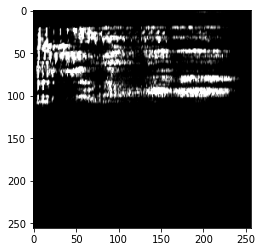

In [ ]:
import matplotlib.pyplot as plt
spectrogram = ((Xtrain[76]))
spectrogram = np.array(spectrogram)
plt.imshow(spectrogram)

In [ ]:
def conv_block(x, filters, stride=(1,1), padding=False, batch_norm = False):
        x = tf.keras.layers.Conv2D(filters, (3,3), strides=stride)(x)
        x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
        if batch_norm:
          x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
        return x

In [ ]:
def get_Model(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    x = conv_block(input_layer, 64, batch_norm=True)
    x = tf.keras.layers.Dropout(0.8)(x)
    #x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    x = conv_block(x, 128, batch_norm=True)
    x = tf.keras.layers.Dropout(0.8)(x)
    #x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    #x = conv_block(x, 64, batch_norm=True)
    #x = tf.keras.layers.Dropout(0.6)(x)
    #x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    '''
    x = conv_block(x, 64, batch_norm=True)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
    '''
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    '''
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    '''
    output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model


In [ ]:
model = get_Model((256, 256, 3))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(x = X_train, y = y_train, validation_split=0.1, epochs=30)

Epoch 1/30
76/76 [==============================] - 35s 289ms/step - loss: 0.2621 - accuracy: 0.9053 - val_loss: 0.9997 - val_accuracy: 0.5185
Epoch 2/30
76/76 [==============================] - 20s 269ms/step - loss: 0.1123 - accuracy: 0.9605 - val_loss: 2.2430 - val_accuracy: 0.5185
Epoch 3/30
76/76 [==============================] - 20s 268ms/step - loss: 0.0702 - accuracy: 0.9774 - val_loss: 2.8940 - val_accuracy: 0.5185
Epoch 4/30
76/76 [==============================] - 20s 269ms/step - loss: 0.0682 - accuracy: 0.9786 - val_loss: 3.3146 - val_accuracy: 0.5185
Epoch 5/30
76/76 [==============================] - 20s 266ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 3.1637 - val_accuracy: 0.5185
Epoch 6/30
76/76 [==============================] - 20s 268ms/step - loss: 0.0374 - accuracy: 0.9868 - val_loss: 2.5186 - val_accuracy: 0.5185
Epoch 7/30
76/76 [==============================] - 20s 269ms/step - loss: 0.0461 - accuracy: 0.9819 - val_loss: 2.2988 - val_accuracy: 0.5185

In [ ]:
import tensorflow as tf
model = get_Model((128, 128, 1))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 63, 63, 64)        0         
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0     

In [ ]:
model.save("sound_model7.h5")

In [ ]:
test_predictions = model.predict(X_test, batch_size=32)

10/10 [==============================] - 1s 71ms/step


In [ ]:
test_predictions

In [ ]:
model = tf.keras.models.load_model('sound_model2.h5')

In [ ]:
def get_accuracy(y_test, predictions):
  correct_pred = 0
  assert len(y_test) == len(predictions)
  for y, pred in zip(y_test, predictions):
    pred = pred[0]
    if round(pred) == y:
      correct_pred +=1
  return correct_pred/len(y_test)

acc = get_accuracy(y_test, test_predictions)
print(acc)

0.91


In [ ]:
test_predictions = np.round(test_predictions)

In [ ]:
tf.math.confusion_matrix(
    y_test,
    test_predictions,
    num_classes=2,
    dtype=tf.dtypes.int32,
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[152,   0],
       [ 27, 121]], dtype=int32)>

In [ ]:
sample_dist = {
    "Human": 0,
    "Nonhuman" : 0
}
for y in y_test:
  if y == 1:
    sample_dist["Human"] += 1
  else:
    sample_dist["Nonhuman"] += 1

In [ ]:
sample_dist

{'Human': 319, 'Nonhuman': 317}

In [ ]:
#acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


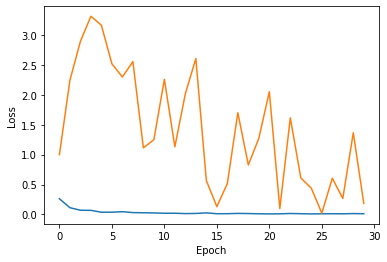

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()